In [132]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.datasets as dset
import torchvision.utils as vutils
import torchvision
from PIL import Image
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [26]:
dataroot = os.path.join(os.getcwd(),"DATA/LANDSAT_PROCESSED/")
dataroot

'/home/yaroslav/repos/research-work/DATA/LANDSAT_PROCESSED/'

In [29]:
os.chdir(dataroot)

In [34]:
paths = os.listdir()

In [42]:
paths

['LC08_101077_20210711.tif',
 'LC08_019036_20210610.tif',
 'LC08_132029_20210720.tif',
 'LC08_120015_20210630.tif',
 'LC08_112026_20210521.tif',
 'LC08_117052_20210711.tif',
 'LC08_050246_20210502.tif',
 'LC08_025022_20210620.tif',
 'LC08_108080_20210610.tif',
 'LC08_091075_20210501.tif',
 'LC08_115056_20210611.tif',
 'LC08_196025_20210720.tif',
 'LC08_023049_20210521.tif',
 'LC08_153032_20210621.tif',
 'LC08_174048_20210710.tif',
 'LC08_217015_20210621.tif',
 'LC08_150040_20210531.tif',
 'LC08_123037_20210502.tif',
 'LC08_065246_20210511.tif',
 'LC08_113080_20210512.tif',
 'LC08_180070_20210720.tif',
 'LC08_116015_20210720.tif',
 'LC08_174083_20210710.tif',
 'LC08_152007_20210630.tif',
 'LC08_219002_20210502.tif',
 'LC08_100081_20210720.tif',
 'LC08_007022_20210521.tif',
 'LC08_170059_20210511.tif',
 'LC08_182050_20210531.tif',
 'LC08_096017_20210521.tif',
 'LC08_031053_20210630.tif',
 'LC08_188051_20210610.tif',
 'LC08_191020_20210701.tif',
 'LC08_182016_20210531.tif',
 'LC08_149025_

In [75]:
class LandsatDataset(Dataset):
    """Landsat Dataset images"""
    
    def __init__(self, dataroot, transform=None):
        """
        Args:
            dataroot (string): Path to images
            transform (callable, optional): Optional transform to be
            appied on a sample
        """
        self.dataroot = dataroot
        self.transform = transform
        self.image_name = os.listdir(self.dataroot)
    
    def __len__(self):
        """Get size of dataset"""
        
        return len(self.image_name)
    
    def __getitem__(self, idx):
        """Link for images in dataset and transforming if also need"""
        
        image_path = os.path.join(self.dataroot,self.image_name[idx])
        image = Image.open(image_path)
        if self.transform:
            image = self.transform(image)
        return image
        

In [221]:
tsfm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(128),
])
landsat = LandsatDataset(dataroot=dataroot, transform=tsfm)
dataloader = DataLoader(dataset=landsat, batch_size=4, shuffle=True)

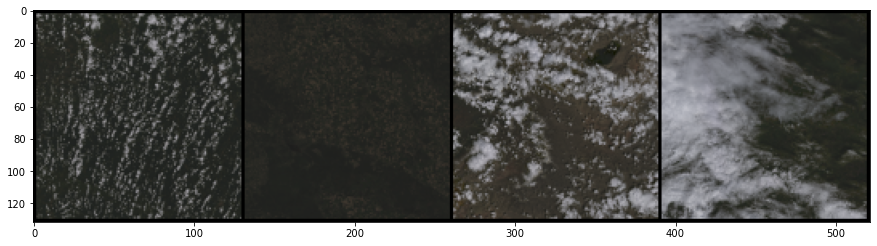

In [227]:
for i, batch in enumerate(dataloader):
    plt.figure(figsize=(15,15))
    grid_img = torchvision.utils.make_grid(batch,normalize=False)
    plt.imshow(grid_img.permute(1,2,0))
    break